In [1]:
import sys
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling ## For easy profiling of pandas DataFrame
import missingno as msno ## Missing value co-occurance analysis
sys.path.append(os.path.abspath("../src/"))

c:\users\saurabh\appdata\local\programs\python\python36\lib\site-packages\pandas_profiling\plot.py:15: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "c:\users\saurabh\appdata\local\programs\python\python36\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "c:\users\saurabh\appdata\local\programs\python\python36\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "c:\users\saurabh\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "c:\users\saurabh\appdata\local\programs\python\python36\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
 

In [2]:
from generic_data_exploration import *
from generic_preprocessing import *
from ml_classification import *

In [3]:
train =pd.read_csv('../data/raw/train.csv',index_col='Loan_ID')
test =pd.read_csv('../data/raw/test.csv',index_col='Loan_ID')
train['source']='train'
test['source']='test'
test['Loan_Status']='NA'

In [4]:
train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,source
Loan_ID,,,,,,,,,,,,,
LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,train
LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,train
LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,train
LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,train
LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,train


In [5]:
test.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,source,Loan_Status
Loan_ID,,,,,,,,,,,,,
LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,test,NA
LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,test,NA
LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,test,NA
LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban,test,NA
LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban,test,NA


In [6]:
df = pd.concat((train,test),axis=0,sort=False)

In [7]:
print(df.info())
print(test.shape, train.shape, df.shape)

<class 'pandas.core.frame.DataFrame'>
Index: 981 entries, LP001002 to LP002989
Data columns (total 13 columns):
Gender               957 non-null object
Married              978 non-null object
Dependents           956 non-null object
Education            981 non-null object
Self_Employed        926 non-null object
ApplicantIncome      981 non-null int64
CoapplicantIncome    981 non-null float64
LoanAmount           954 non-null float64
Loan_Amount_Term     961 non-null float64
Credit_History       902 non-null float64
Property_Area        981 non-null object
Loan_Status          981 non-null object
source               981 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 107.3+ KB
None
(367, 13) (614, 13) (981, 13)


In [8]:
do_data_profiling(df,'../reports/Loan_data_profiling.html')

Data profiling done


In [9]:
do_simple_data_profiling(df)

Missing Value
Gender               24
Married               3
Dependents           25
Education             0
Self_Employed        55
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           27
Loan_Amount_Term     20
Credit_History       79
Property_Area         0
Loan_Status           0
source                0
dtype: int64


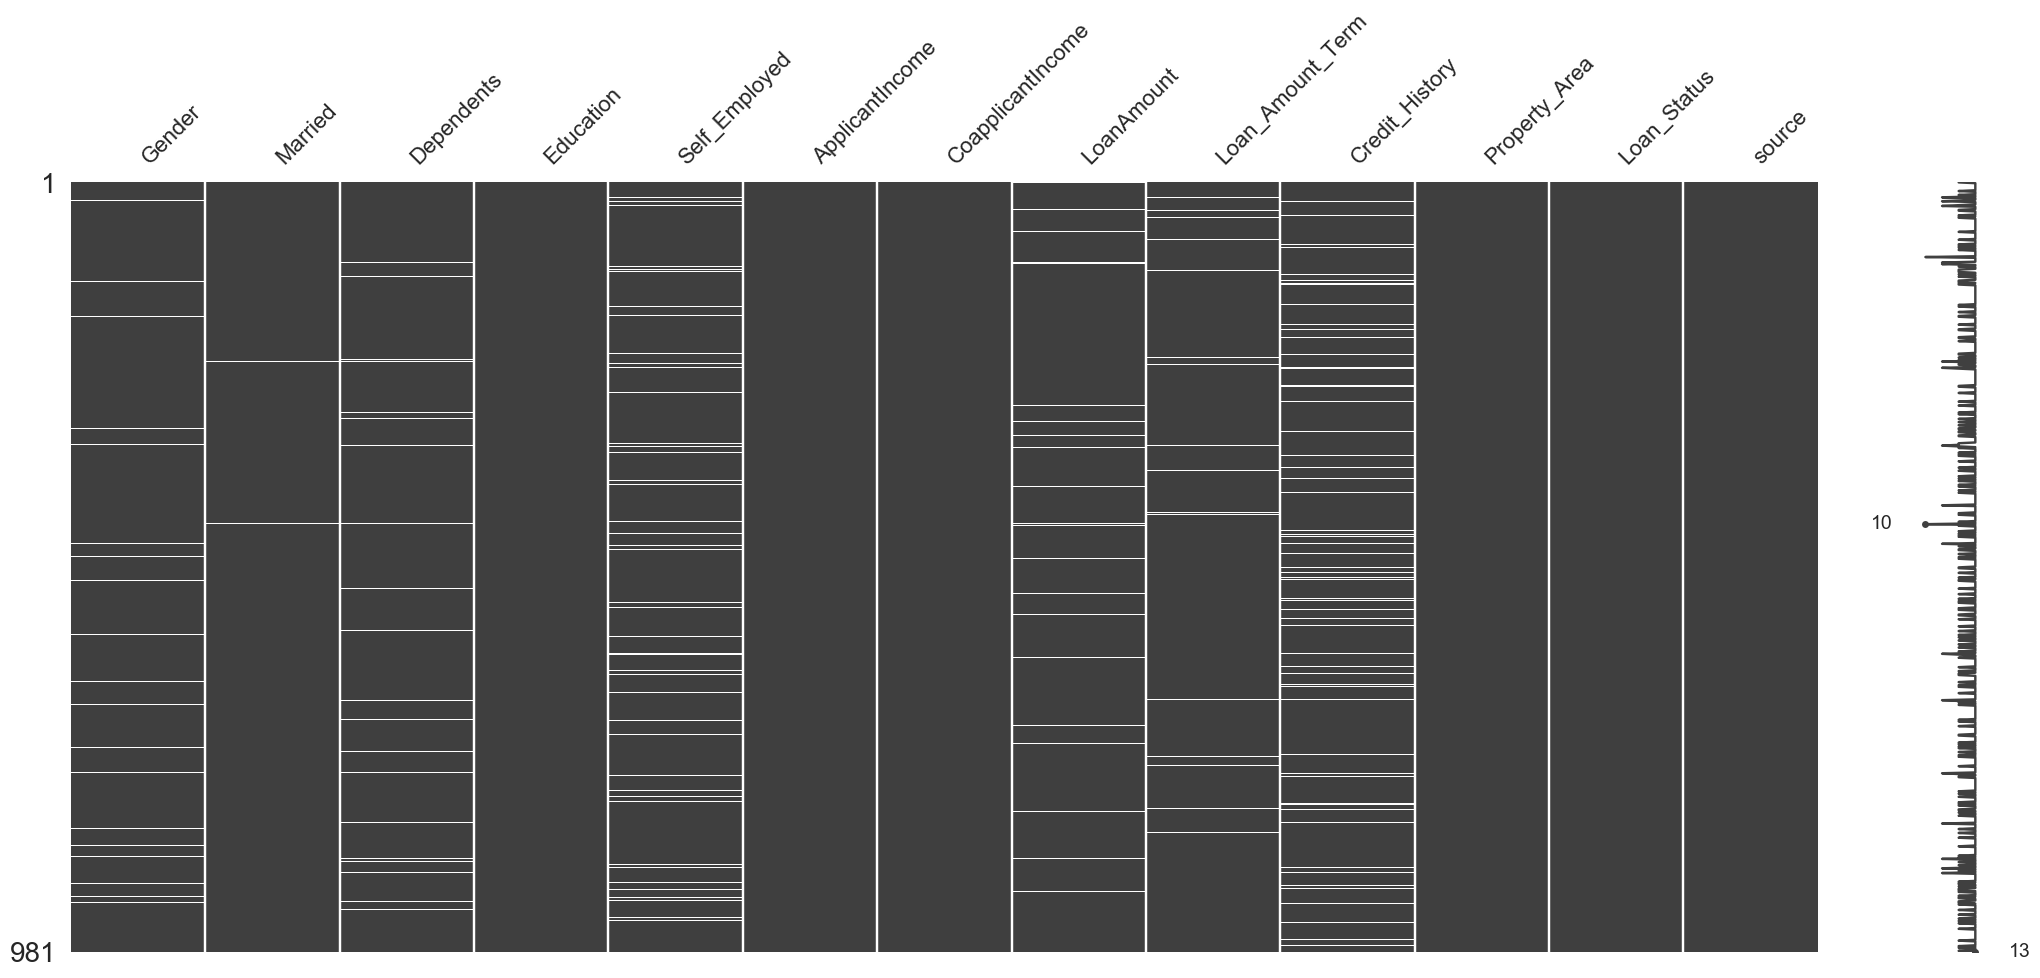

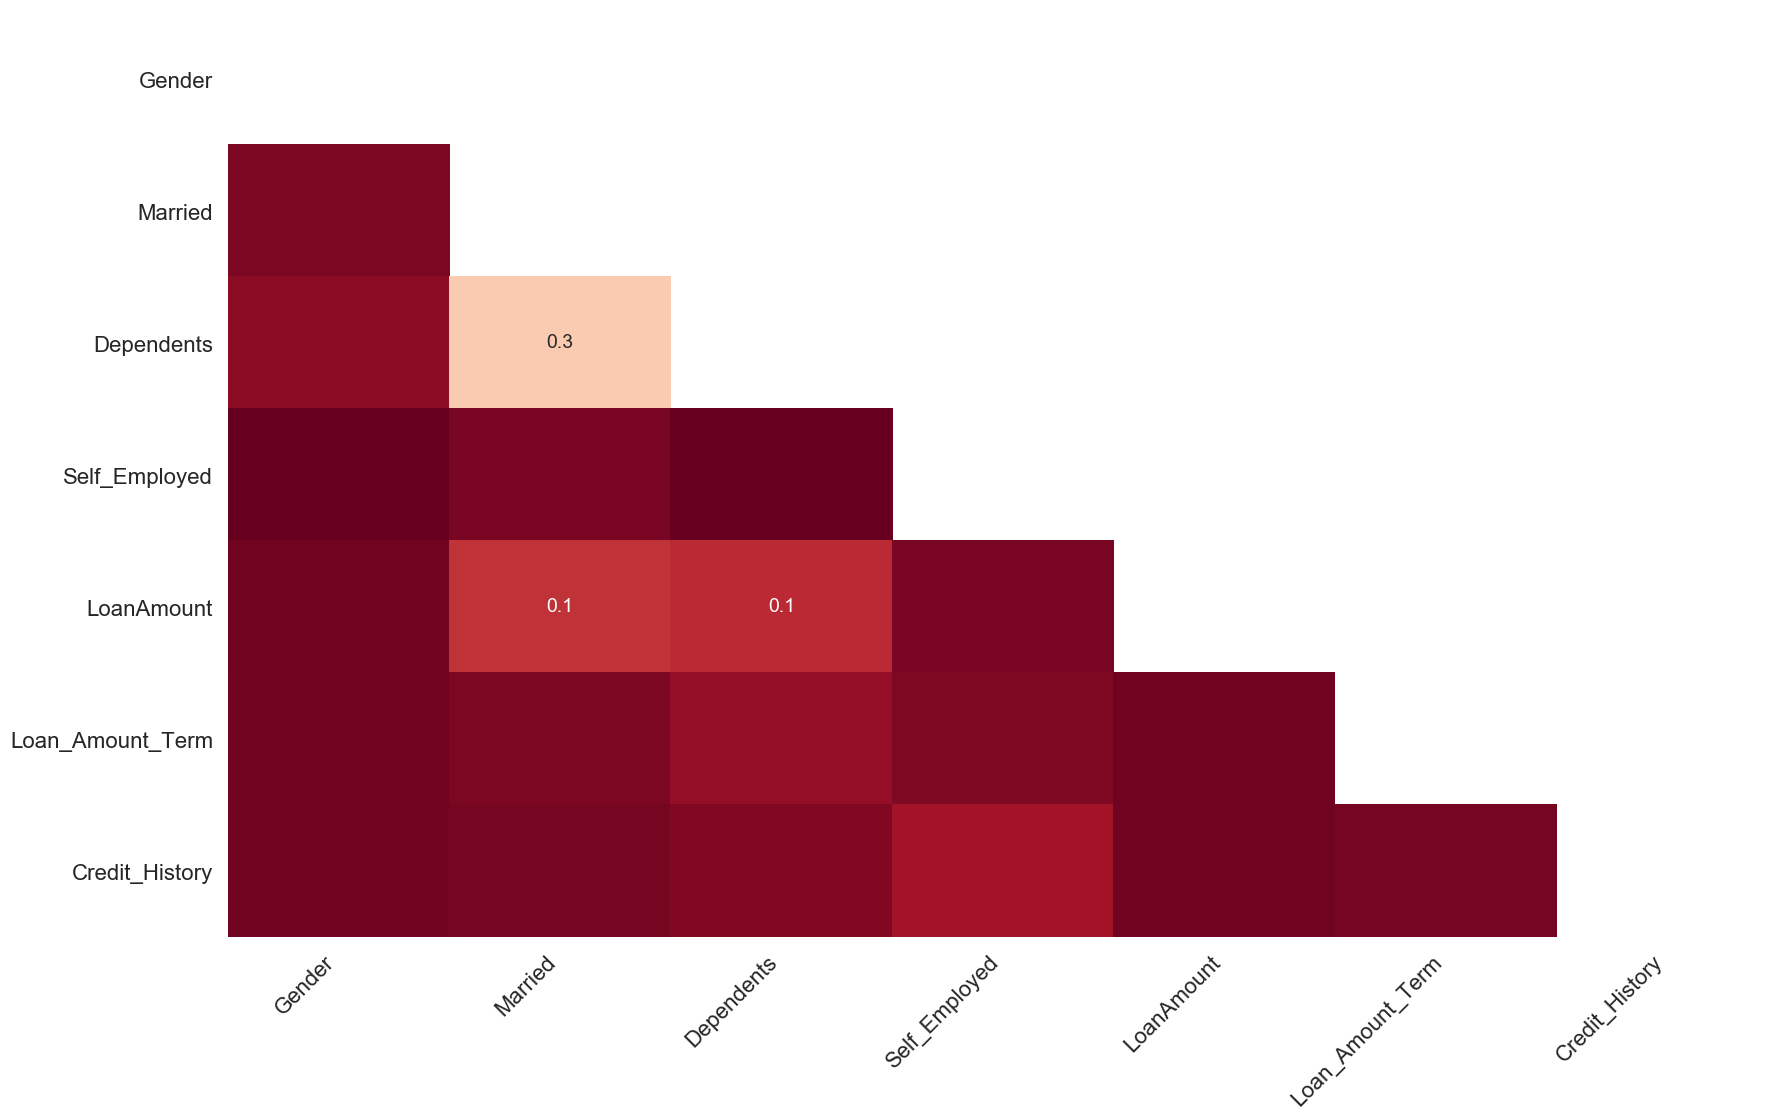

In [10]:
missing_value_analysis(df)

In [11]:
print_dataunique(df)

0 Gender object 3 ['Male' 'Female' nan]
1 Married object 3 ['No' 'Yes' nan]
2 Dependents object 5 ['0' '1' '2' '3+' nan]
3 Education object 2 ['Graduate' 'Not Graduate']
4 Self_Employed object 3 ['No' 'Yes' nan]
5 ApplicantIncome int64 752 [5849 4583 3000 2583 6000]
6 CoapplicantIncome float64 437 [   0. 1508. 2358. 4196. 1516.]
7 LoanAmount float64 233 [ nan 128.  66. 120. 141.]
8 Loan_Amount_Term float64 13 [360. 120. 240.  nan 180.]
9 Credit_History float64 3 [ 1.  0. nan]
10 Property_Area object 3 ['Urban' 'Rural' 'Semiurban']
11 Loan_Status object 3 ['Y' 'N' 'NA']
12 source object 2 ['train' 'test']


In [12]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,981.000000,981.000000,954.000000,961.000000,902.000000
mean,5179.795107,1601.916330,142.511530,342.201873,0.835920
std,5695.104533,2718.772806,77.421743,65.100602,0.370553
min,0.000000,0.000000,9.000000,6.000000,0.000000
25%,2875.000000,0.000000,100.000000,360.000000,1.000000
50%,3800.000000,1110.000000,126.000000,360.000000,1.000000
75%,5516.000000,2365.000000,162.000000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [13]:
df['Gender'].value_counts()

Male      775
Female    182
Name: Gender, dtype: int64

## Graduate Applicants have high income than not graduate applicant

In [14]:
df[(df.Education=='Graduate')].mean()

ApplicantIncome      5602.440367
CoapplicantIncome    1689.618506
LoanAmount            149.297043
Loan_Amount_Term      343.041278
Credit_History          0.849003
dtype: float64

In [15]:
df[(df.Education!='Graduate')].mean()

ApplicantIncome      3700.536697
CoapplicantIncome    1294.958716
LoanAmount            118.471429
Loan_Amount_Term      339.200000
Credit_History          0.790000
dtype: float64

## Probability of getting loan for each Credit History class

In [16]:
df.pivot_table(values='Loan_Status',index=['Credit_History'],aggfunc=lambda x: x.map({'Y':1,'N':0}).mean())

,Loan_Status
Credit_History,
0.0,0.078652
1.0,0.795789


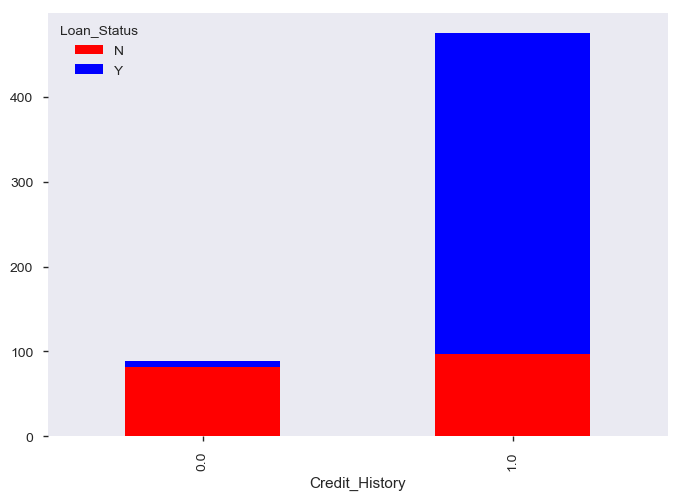

In [17]:
temp3 = pd.crosstab(df[df.Loan_Status!='NA']['Credit_History'], df[df.Loan_Status!='NA']['Loan_Status'])
temp3.plot(kind='bar', stacked=True, color=['red','blue'], grid=False)

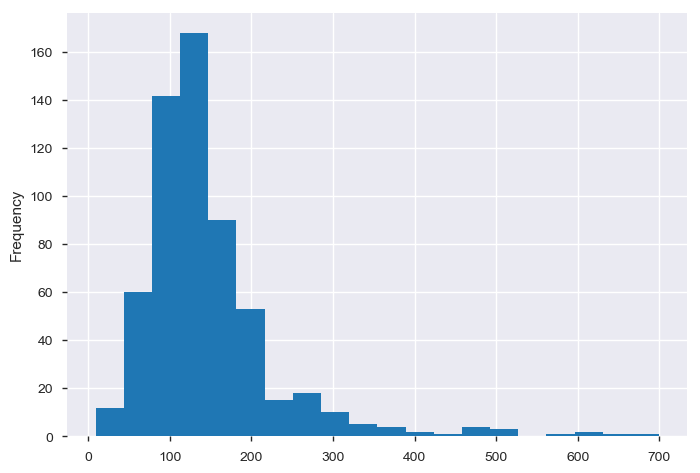

In [18]:
df[df.Loan_Status!='NA']['LoanAmount'].plot(kind='hist',bins=20)
#, df[df.Loan_Status!='NA']['Total_income']

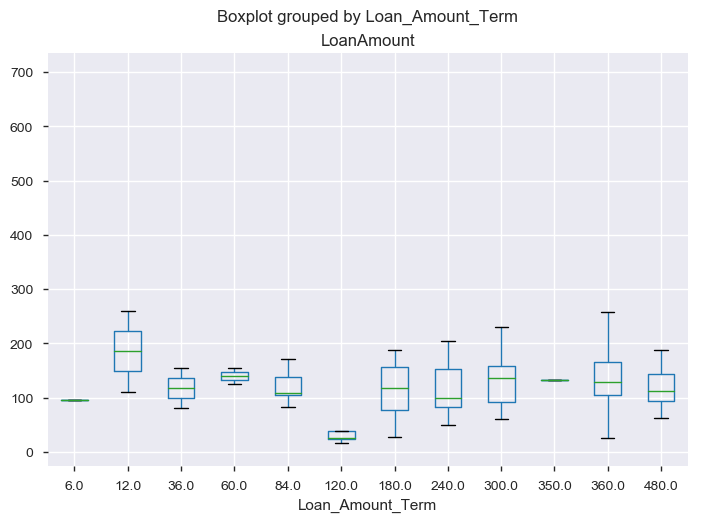

In [19]:
df.boxplot(column='LoanAmount',by='Loan_Amount_Term')

## Probability based on Applicant education and Employement

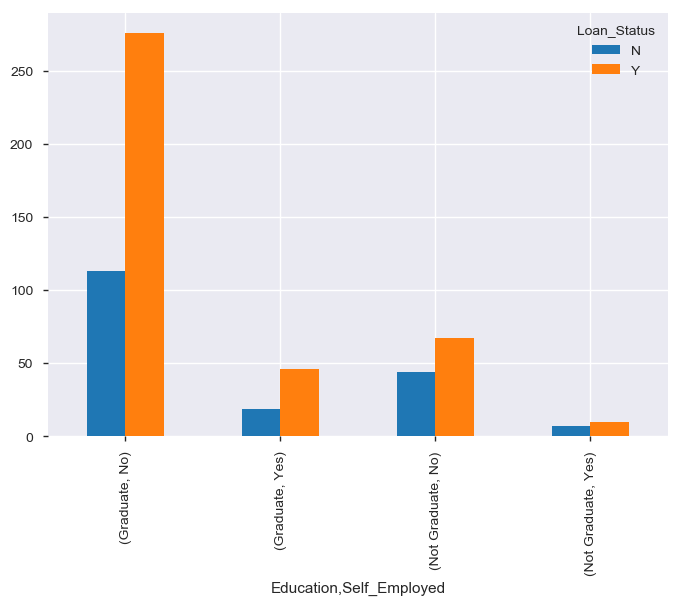

In [20]:
temp3 = pd.crosstab([df[df.Loan_Status!='NA']['Education'],df[df.Loan_Status!='NA']['Self_Employed']],df[df.Loan_Status!='NA']['Loan_Status'])
temp3.plot(kind='bar')

## Education wise credit history 

In [21]:
df[(df.Education!='Graduate')]['Credit_History'].value_counts(ascending=True)

0.0     42
1.0    158
Name: Credit_History, dtype: int64

In [22]:
df[(df.Education=='Graduate')]['Credit_History'].value_counts(ascending=True)

0.0    106
1.0    596
Name: Credit_History, dtype: int64

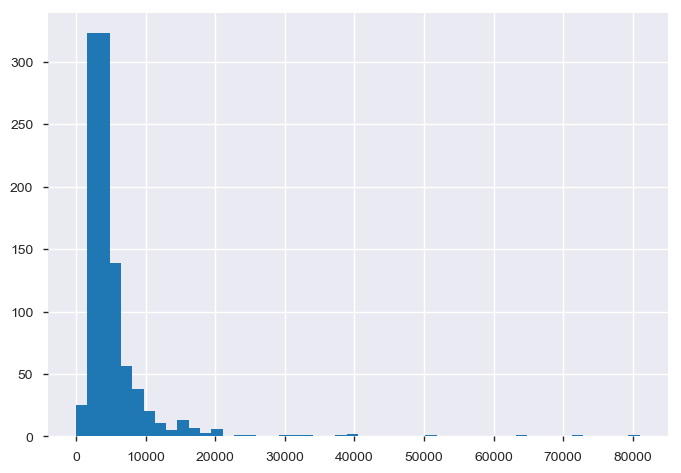

In [23]:
df['ApplicantIncome'].hist(bins=50)

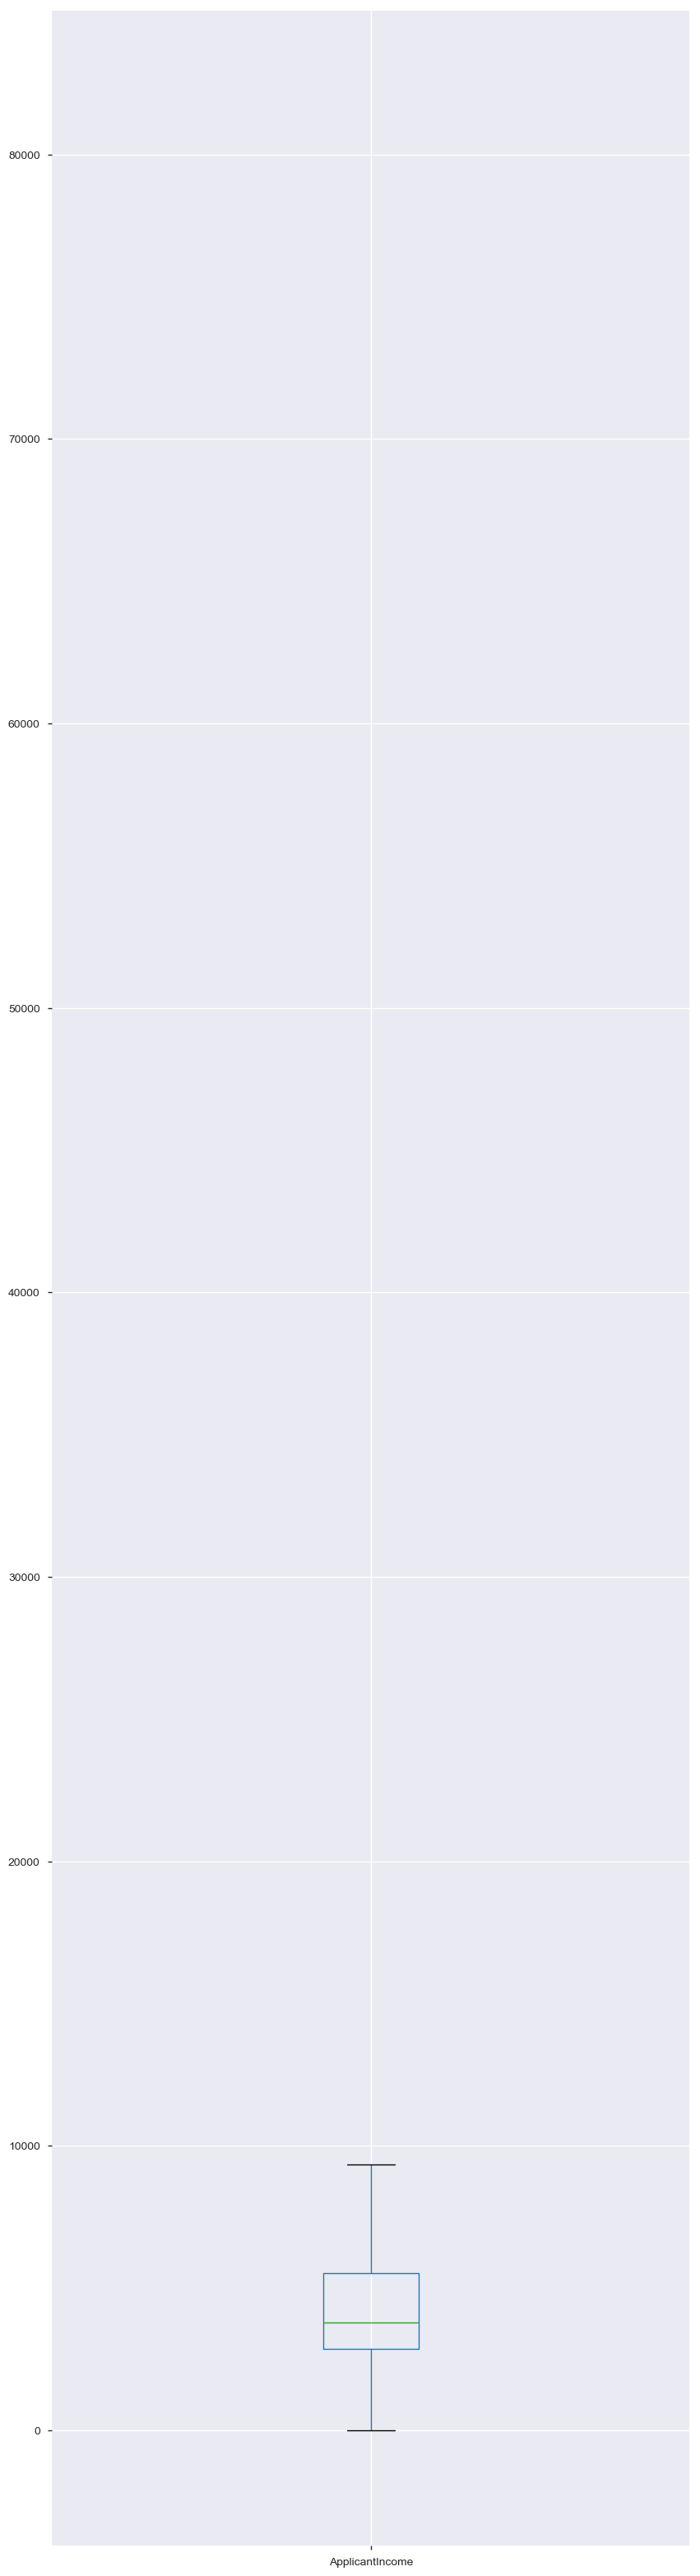

In [24]:
df.boxplot(column='ApplicantIncome', figsize=(10,40))


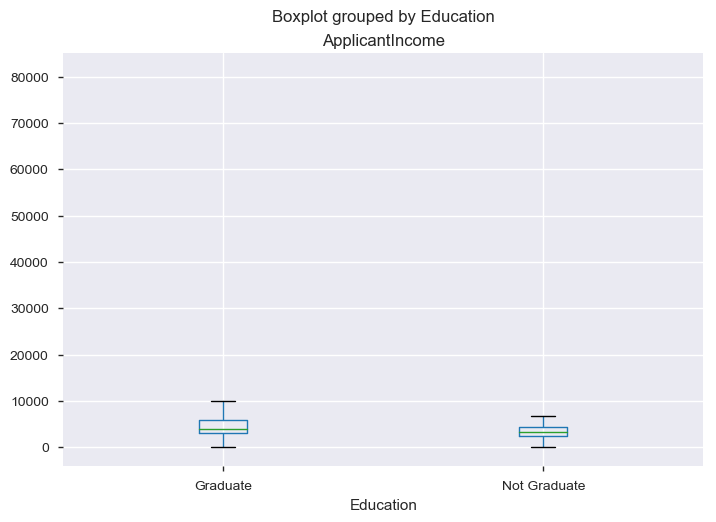

In [25]:
df.boxplot(column='ApplicantIncome', by = 'Education')

In [26]:
#df.pivot_table(values='Loan_Status',index=['Credit_History'],aggfunc=lambda x: x.map({'Y':1,'N':0}).mean())
df.pivot_table(values='Self_Employed',index=['Education'],aggfunc=lambda x: x.map({'Yes':1,'No':0}).mean())
#df.boxplot(column='Self_Employed', by = 'Education')

,Self_Employed
Education,
Graduate,0.130556
Not Graduate,0.121359


## Treating Missing Values

In [27]:
 df.apply(lambda x: sum(x.isnull()),axis=0)

Gender               24
Married               3
Dependents           25
Education             0
Self_Employed        55
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           27
Loan_Amount_Term     20
Credit_History       79
Property_Area         0
Loan_Status           0
source                0
dtype: int64

In [28]:
df['Self_Employed'].value_counts()

No     807
Yes    119
Name: Self_Employed, dtype: int64

In [29]:
 df['Self_Employed'].fillna('No',inplace=True)

### Since ~86% values are “No”, it is safe to impute the missing values as “No” as there is a high probability of success

In [30]:
treat_missing_categorical(df,['Gender','Married','Dependents'],how = 'mode')

Filling missing values with mode for columns - Gender
Filling missing values with mode for columns - Married
Filling missing values with mode for columns - Dependents


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,source
Loan_ID,,,,,,,,,,,,,
LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,train
LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,train
LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,train
LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,train
LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,train
LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y,train
LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y,train
LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N,train
LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y,train


In [31]:
treat_missing_numeric(df,['LoanAmount'],how = 'mean')

Filling missing values with mean for columns - LoanAmount


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,source
Loan_ID,,,,,,,,,,,,,
LP001002,Male,No,0,Graduate,No,5849,0.0,142.51153,360.0,1.0,Urban,Y,train
LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.00000,360.0,1.0,Rural,N,train
LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.00000,360.0,1.0,Urban,Y,train
LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.00000,360.0,1.0,Urban,Y,train
LP001008,Male,No,0,Graduate,No,6000,0.0,141.00000,360.0,1.0,Urban,Y,train
LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.00000,360.0,1.0,Urban,Y,train
LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.00000,360.0,1.0,Urban,Y,train
LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.00000,360.0,0.0,Semiurban,N,train
LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.00000,360.0,1.0,Urban,Y,train


In [32]:
treat_missing_numeric(df,['Credit_History','Loan_Amount_Term'],how = 'mode')

Filling missing values with mode for columns - Credit_History
Filling missing values with mode for columns - Loan_Amount_Term


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,source
Loan_ID,,,,,,,,,,,,,
LP001002,Male,No,0,Graduate,No,5849,0.0,142.51153,360.0,1.0,Urban,Y,train
LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.00000,360.0,1.0,Rural,N,train
LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.00000,360.0,1.0,Urban,Y,train
LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.00000,360.0,1.0,Urban,Y,train
LP001008,Male,No,0,Graduate,No,6000,0.0,141.00000,360.0,1.0,Urban,Y,train
LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.00000,360.0,1.0,Urban,Y,train
LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.00000,360.0,1.0,Urban,Y,train
LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.00000,360.0,0.0,Semiurban,N,train
LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.00000,360.0,1.0,Urban,Y,train


In [33]:
 df.apply(lambda x: sum(x.isnull()),axis=0)

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
source               0
dtype: int64

### Feature Engineering

In [34]:
#creating Total income feature
df['Total_income'] = df['ApplicantIncome']+df['CoapplicantIncome']

In [35]:
# create fare bin feature
df['Salary_group'] = pd.qcut(df.Total_income, 4, labels=['very_low','low','average','high'])

### Label encoding

In [36]:
train_df = df[df['source']=='train']
test_df = df[df['source']=='test']

In [37]:
test_df=test_df.copy()
test_df.drop(['Loan_Status'],axis=1,inplace=True)
train_df.drop(['source'],axis=1,inplace=True)
test_df.drop(['source'],axis=1,inplace=True)

c:\users\saurabh\appdata\local\programs\python\python36\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [38]:
train_df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_income,Salary_group
Loan_ID,,,,,,,,,,,,,,
LP001002,Male,No,0,Graduate,No,5849,0.0,142.51153,360.0,1.0,Urban,Y,5849.0,average
LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.00000,360.0,1.0,Rural,N,6091.0,average
LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.00000,360.0,1.0,Urban,Y,3000.0,very_low
LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.00000,360.0,1.0,Urban,Y,4941.0,low
LP001008,Male,No,0,Graduate,No,6000,0.0,141.00000,360.0,1.0,Urban,Y,6000.0,average


In [39]:
label_encoder(train_df,['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status','Salary_group'])
label_encoder(test_df,['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Salary_group'])

Label encoding column - Gender
Label encoding column - Married
Label encoding column - Dependents
Label encoding column - Education


D:\2018\GIT\Projects\loan_prediction_iii\src\generic_preprocessing.py:132: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df[c] = lbl.transform(list(df[c].values.astype('str')))


Label encoding column - Self_Employed
Label encoding column - Property_Area
Label encoding column - Loan_Status
Label encoding column - Salary_group
Label encoding column - Gender
Label encoding column - Married
Label encoding column - Dependents
Label encoding column - Education
Label encoding column - Self_Employed
Label encoding column - Property_Area
Label encoding column - Salary_group


(          Gender  Married  Dependents  Education  Self_Employed  \
 Loan_ID                                                           
 LP001015       1        1           0          0              0   
 LP001022       1        1           1          0              0   
 LP001031       1        1           2          0              0   
 LP001035       1        1           2          0              0   
 LP001051       1        0           0          1              0   
 LP001054       1        1           0          1              1   
 LP001055       0        0           1          1              0   
 LP001056       1        1           2          1              0   
 LP001059       1        1           2          0              0   
 LP001067       1        0           0          1              0   
 LP001078       1        0           0          1              0   
 LP001082       1        1           1          0              0   
 LP001083       1        0           3          

## Building model

In [40]:
X=train_df[['Gender','Married','Dependents','Education','Self_Employed','ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History','Property_Area','Total_income','Salary_group']]
y=train_df[['Loan_Status']]
#X=train_df[['Credit_History','Property_Area','Total_income']]
#y=train_df[['Loan_Status']]

In [41]:
## Creating hold-out CV
X_train, X_test, y_train, y_test = holdout_cv(X,y,size =0.3)

In [42]:
### Running Xgboost
pred_y_test, loss,_,xgb_model = runXGB(X_train.values, y_train, X_test.values, y_test)

[0]	train-auc:0.743263	test-auc:0.576679
Multiple eval metrics have been passed: 'test-auc' will be used for early stopping.

Will train until test-auc hasn't improved in 100 rounds.
[20]	train-auc:0.971669	test-auc:0.758726
[40]	train-auc:0.980071	test-auc:0.763617
[60]	train-auc:0.986065	test-auc:0.774061
[80]	train-auc:0.991598	test-auc:0.774987
[100]	train-auc:0.995287	test-auc:0.776705
[120]	train-auc:0.997362	test-auc:0.77221
[140]	train-auc:0.998719	test-auc:0.770492
[160]	train-auc:0.999206	test-auc:0.770492
[180]	train-auc:0.999616	test-auc:0.77459
Stopping. Best iteration:
[86]	train-auc:0.992904	test-auc:0.778424



In [43]:
### Running Xgboost classifier for model explaination
pred_y_test, loss,_,xgbc_model = runXGBC(X_train.values, y_train, X_test.values, y_test)

c:\users\saurabh\appdata\local\programs\python\python36\lib\site-packages\sklearn\preprocessing\label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\saurabh\appdata\local\programs\python\python36\lib\site-packages\sklearn\preprocessing\label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train and Test loss :  1.0 0.772972972972973


c:\users\saurabh\appdata\local\programs\python\python36\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
c:\users\saurabh\appdata\local\programs\python\python36\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [44]:
### Running LightGBM
#pred_y_test, loss,_,lgb_model = runLGB(X_train.values, y_train, X_test.values, y_test)

In [45]:
### Running LightGBM classifier for model explaination
pred_y_test, loss,_,lgbc_model = runLGBC(X_train.values, y_train, X_test.values, y_test)

Train and Test loss :  0.8181818181818182 0.7891891891891892


c:\users\saurabh\appdata\local\programs\python\python36\lib\site-packages\sklearn\preprocessing\label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\saurabh\appdata\local\programs\python\python36\lib\site-packages\sklearn\preprocessing\label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\saurabh\appdata\local\programs\python\python36\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
c:\users\saurabh\appdata\local\programs\python\python36\lib\site-packages\sklearn\preprocessing

In [46]:
### Running Extra Trees
pred_y_test, loss,_,et_model = runET(X_train.values, y_train, X_test.values, y_test)

D:\2018\GIT\Projects\loan_prediction_iii\src\ml_classification.py:241: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(train_X, train_y)


Depth, leaf, feat :  20 10 0.2
Train and Test loss :  0.8181818181818182 0.7891891891891892
Train Cross Validation mean :  0.8181918856337461
Train Cross Validation Std :  0.03060696463008939
Test Cross Validation mean :  0.7735380116959064
Test Cross Validation Std :  0.05531051685269099


In [47]:
### Running Random Forest
pred_y_test, loss,_,rf_model = runRF(X_train.values, y_train, X_test.values, y_test)

D:\2018\GIT\Projects\loan_prediction_iii\src\ml_classification.py:275: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(train_X, train_y)


Train and Test loss :  0.8181818181818182 0.7837837837837838
Train Cross Validation mean :  0.8066168327796234
Train Cross Validation Std :  0.032121674695778
Test Cross Validation mean :  0.6816666666666668
Test Cross Validation Std :  0.030222109630807962


In [48]:
### Running Logistic Regression
pred_y_test, loss,_,lr_model = runLR(X_train.values, y_train, X_test.values, y_test)

Train and Test loss :  0.8228438228438228 0.7891891891891892
Train Cross Validation mean :  0.8205174670290949
Train Cross Validation Std :  0.03277063234356844
Test Cross Validation mean :  0.7846198830409357
Test Cross Validation Std :  0.06831603376370879


c:\users\saurabh\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\saurabh\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:1232: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))
c:\users\saurabh\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:1232: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))
c:\users\saurabh\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:1232: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'.

In [49]:
### Running Decision Tree
pred_y_test, loss,_,dt_model = runDT(X_train.values, y_train, X_test.values, y_test)

Train and Test loss :  1.0 0.7243243243243244
Train Cross Validation mean :  0.7222868217054265
Train Cross Validation Std :  0.05015591320774046
Test Cross Validation mean :  0.7203216374269006
Test Cross Validation Std :  0.09164707812751909


In [50]:
## Running K-Nearest Neighbour
pred_y_test, loss,_,knn_model = runKNN(X_train.values, y_train, X_test.values, y_test)

D:\2018\GIT\Projects\loan_prediction_iii\src\ml_classification.py:357: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  model.fit(train_X, train_y)


Train and Test loss :  0.7552447552447552 0.6270270270270271
Train Cross Validation mean :  0.6734420618141549
Train Cross Validation Std :  0.04460457943141659
Test Cross Validation mean :  0.6228070175438597
Test Cross Validation Std :  0.10110365291999916


In [51]:
pred_y_test, loss,_,svc_model = runSVC(X_train.values, y_train, X_test.values, y_test,grid_search='N')

Train and Test loss :  1.0 0.6756756756756757


c:\users\saurabh\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train Cross Validation mean :  0.6946491493003121
Train Cross Validation Std :  0.0051334849543906245
Test Cross Validation mean :  0.6702631578947369
Test Cross Validation Std :  0.010352735485881406


In [52]:
#test_df=test_df[['Credit_History','Property_Area','Total_income']]

In [53]:
import numpy as np

def get_loan_status(status):
    if status == 0:
        return 'N'
    else:
        return 'Y'
    
def get_submission_file(model, filename):
    # converting to the matrix
    test_X = test_df.as_matrix().astype('float')
    # make predictions
    predictions = model.predict(test_X)
    ## to convert 1 to Y and 0 to N in numpy array
    vecfunc=np.vectorize(get_loan_status)
    result=vecfunc(predictions)
    # submission dataframe
    df_submission = pd.DataFrame({'Loan_ID': test_df.index, 'Loan_Status' : result})
    # submission file
    submission_data_path = os.path.join(os.path.pardir,'data','external')
    submission_file_path = os.path.join(submission_data_path, filename)
    # write to the file
    df_submission.to_csv(submission_file_path, index=False)

In [54]:
get_submission_file(model, '07_lda.csv')

NameError: name 'model' is not defined

In [55]:
# Load libraries
from pandas.plotting import scatter_matrix
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
import xgboost as xgb

In [56]:
# Test options and evaluation metric
seed = 0
scoring = 'accuracy'

In [57]:
models = []
v_jobs=1
models.append(('LR', LogisticRegression(C=1.0,penalty='l2', n_jobs=v_jobs)))
models.append(('KNN', KNeighborsClassifier(n_neighbors=10,n_jobs=v_jobs)))
models.append(('DT', DecisionTreeClassifier(
                criterion='gini',
                max_depth=None,
                min_samples_split=2,
                min_samples_leaf=1)))
models.append(('ET', ExtraTreesClassifier(
                n_estimators=100,
                max_depth=20,
                min_samples_split=2,
                min_samples_leaf=10,
                max_features=0.2,
                n_jobs=v_jobs,
                random_state=101)))
models.append(('RF', RandomForestClassifier(
                n_estimators=100,
                max_depth=20,
                min_samples_split=2,
                min_samples_leaf=10,
                max_features=0.2,
                n_jobs=v_jobs,
                random_state=101)))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(
                C=1.0,
                kernel='rbf',
                probability=True)))
models.append(('RFC', RandomForestClassifier(n_estimators = 30,
                    max_depth = 10,
                    min_samples_split = 2,
                    min_samples_leaf = 10,
                    max_features =  0.2,
                    n_jobs = v_jobs,
                    random_state = 100)))
models.append(('LDA', LinearDiscriminantAnalysis()))

# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    model.fit(X_train, y_train.values.ravel())
    cv_results = model_selection.cross_val_score(model, X_train, y_train.values.ravel(), scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.822740 (0.019353)
KNN: 0.643410 (0.013688)
DT: 0.718004 (0.028064)
ET: 0.808786 (0.012913)
RF: 0.790187 (0.006419)
NB: 0.799560 (0.013920)
SVM: 0.694645 (0.001995)
RFC: 0.801728 (0.024913)
LDA: 0.818110 (0.015969)


c:\users\saurabh\appdata\local\programs\python\python36\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
c:\users\saurabh\appdata\local\programs\python\python36\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
c:\users\saurabh\appdata\local\programs\python\python36\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
c:\users\saurabh\appdata\local\programs\python\python36\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


In [59]:
models = []
v_jobs=1
models.append(('LR', LogisticRegression(C=1.0,penalty='l2', n_jobs=v_jobs)))
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    model.fit(X_train, y_train.values.ravel())
    cv_results = model_selection.cross_val_score(model, X_train, y_train.values.ravel(), scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.822740 (0.019353)


In [60]:
from sklearn.model_selection import GridSearchCV

In [61]:
tuned_parameters  = {'C':[1.0,10.0,20.0,50.0,100.0],'penalty' : ['l1','l2']}

In [70]:
grid_search = GridSearchCV(estimator = model,
                           param_grid = tuned_parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search = grid_search.fit(X_train, y_train.values.ravel())
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("best_accuracy:",best_accuracy)
print("best_parameters:",best_parameters)

best_accuracy: 0.8205128205128205
best_parameters: {'C': 1.0, 'penalty': 'l1'}


In [73]:
# scores = ['precision', 'recall','accuracy']

# for score in scores:
print("# Tuning hyper-parameters for %s" % score)
print()

clf = GridSearchCV(LogisticRegression(), tuned_parameters, cv=5,scoring = 'accuracy')
clf.fit(X_train, y_train.values.ravel())

print("Best parameters set found on development set:")
print()
print(clf.best_params_)
print()
print("Grid scores on development set:")
print()
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
          % (mean, std * 2, params))
print()

print("Detailed classification report:")
print()
print("The model is trained on the full development set.")
print("The scores are computed on the full evaluation set.")
print()
y_true, y_pred = y_test, clf.predict(X_test)
print(classification_report(y_true, y_pred))
print()

# Tuning hyper-parameters for accuracy

Best parameters set found on development set:

{'C': 1.0, 'penalty': 'l1'}

Grid scores on development set:

0.823 (+/-0.032) for {'C': 1.0, 'penalty': 'l1'}
0.821 (+/-0.032) for {'C': 1.0, 'penalty': 'l2'}
0.823 (+/-0.032) for {'C': 10.0, 'penalty': 'l1'}
0.821 (+/-0.039) for {'C': 10.0, 'penalty': 'l2'}
0.821 (+/-0.039) for {'C': 20.0, 'penalty': 'l1'}
0.823 (+/-0.032) for {'C': 20.0, 'penalty': 'l2'}
0.821 (+/-0.039) for {'C': 50.0, 'penalty': 'l1'}
0.823 (+/-0.032) for {'C': 50.0, 'penalty': 'l2'}
0.821 (+/-0.039) for {'C': 100.0, 'penalty': 'l1'}
0.823 (+/-0.032) for {'C': 100.0, 'penalty': 'l2'}

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

             precision    recall  f1-score   support

          0       0.89      0.41      0.56        61
          1       0.77      0.98      0.86       124

avg / total       0.81      0.79      0.76       185


In [ ]:
predictor_var = ['Credit_History','Property_Area','Total_income']

In [ ]:
#Create a series with feature importances:
featimp = pd.Series(model.feature_importances_, index=predictor_var).sort_values(ascending=False)
print (featimp)